In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
data.head().T

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Customer Lifetime Value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Income,56274,0,48767,0,43836


In [4]:
data.shape

(9134, 24)

# Changing format of columns

In [5]:
cols = []

for col in data.columns:
    temp = col.lower().replace(" ", "_")
    cols.append(temp)
    
data.columns = cols

In [6]:
data.head().T

,0,1,2,3,4
customer,BU79786,QZ44356,AI49188,WW63253,HB64268
state,Washington,Arizona,Nevada,California,Washington
customer_lifetime_value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575
response,No,No,No,No,No
coverage,Basic,Extended,Premium,Basic,Basic
education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
effective_to_date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
employmentstatus,Employed,Unemployed,Employed,Unemployed,Employed
gender,F,F,F,M,M
income,56274,0,48767,0,43836


# Cleaning numerical data

In [7]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [8]:
data["effective_to_date"] = pd.to_datetime(data["effective_to_date"])

In [9]:
data["effective_to_date"].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

In [10]:
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

# Creating numerical dataframe.

In [11]:
numerical_df = data.select_dtypes(np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [12]:
numerical_df.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

# Creating continuous and discrete variables

In [13]:
# The key difference between discrete and continuous data is that discrete data contains the integer or whole number. 
# Still, continuous data stores the fractional numbers to record different types of data such as temperature, height, width, time, speed, etc.

In [14]:
d_names = []
c_names = []

def differentiate():

    for i in numerical_df:
    
        if numerical_df[i].nunique()/len(numerical_df) > 0.5:
            c_names.append(numerical_df[i].name)
        else:
            d_names.append(numerical_df[i].name)

In [15]:
# Looking at above unique value..it seems columns greater than 50% have continuous values.

differentiate()
discrete_df = numerical_df[d_names]
continuous_df = numerical_df[c_names]


In [16]:
discrete_df.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


In [17]:
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


# Plot a correlation matrix

<Axes: >

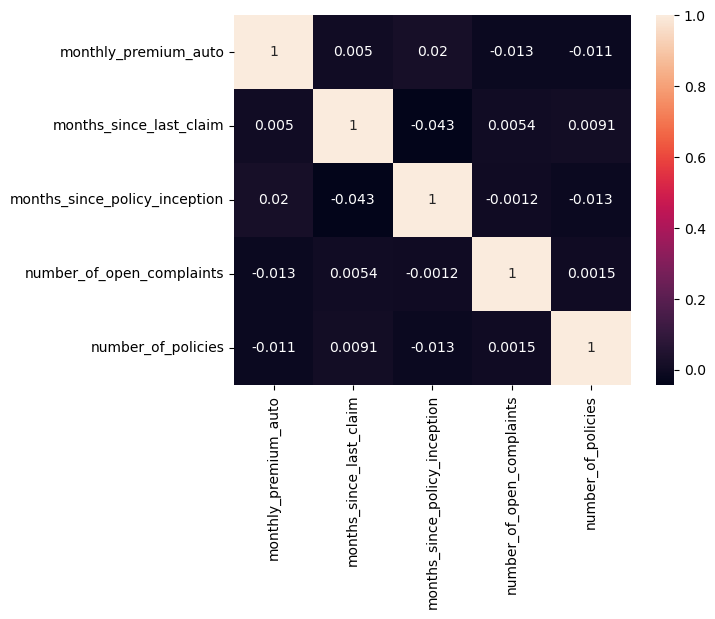

In [18]:
disc_corr = discrete_df.corr()
sns.heatmap(disc_corr, annot = True)

Continuous columns have very low correlation among themselves. Some have negatives ones.

<Axes: >

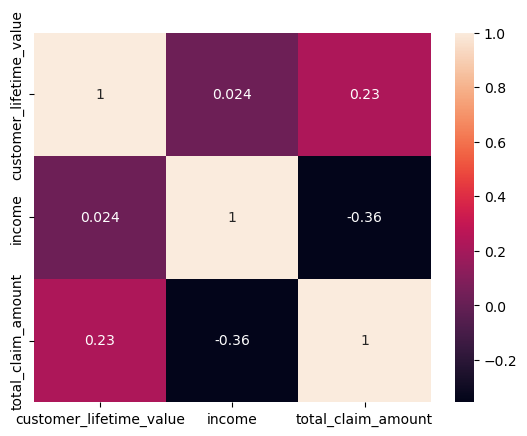

In [19]:
cont_corr = continuous_df.corr()
sns.heatmap(cont_corr, annot = True)

total_claim_amount and customer_lifetime_value has better correlation compared with others.

# Create a function to plot every discrete variable. Do the same with the continuous variables

In [20]:
def plot_continuous_data(df):
    
    for i in df.columns:
        sns.displot(df[i], bins = 20, kde = True)
        

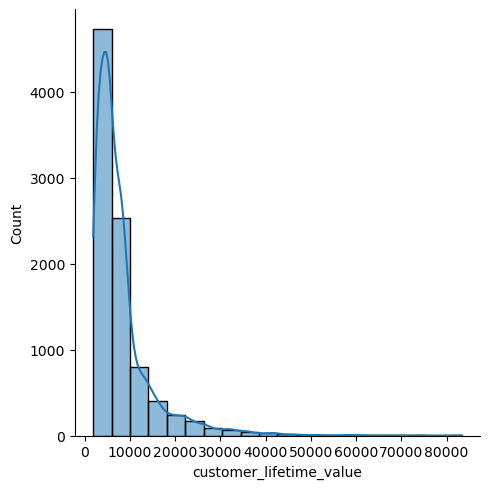

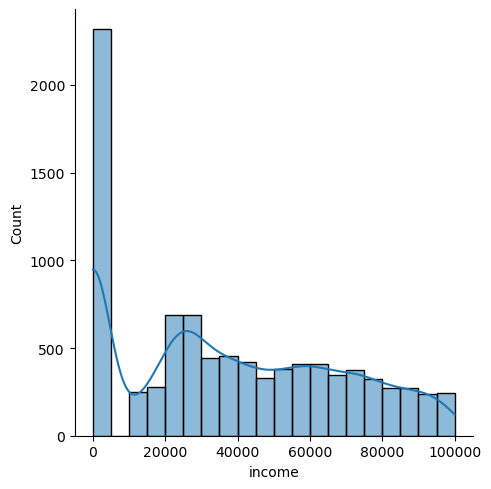

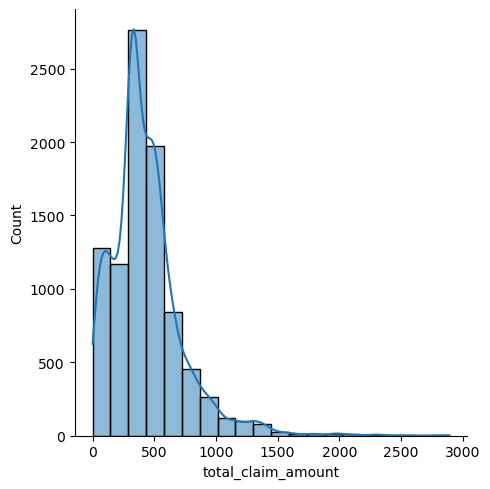

In [21]:
plot_continuous_data(continuous_df)

Customer_lifetime_value is skewed towards right. So towards end of the tail seems to be possible outliers.
Income has gone down sharply after 10000. That looks like outliers.
Total_claim_amount is also skewed towards right. That seems to be possible outliers.

In [22]:
def plot_discrete_data(df):
    
    for i in df.columns:
#         sns.countplot(data = df, x = i)
        sns.displot(df[i], bins = 20, kde = True)
        plt.show()

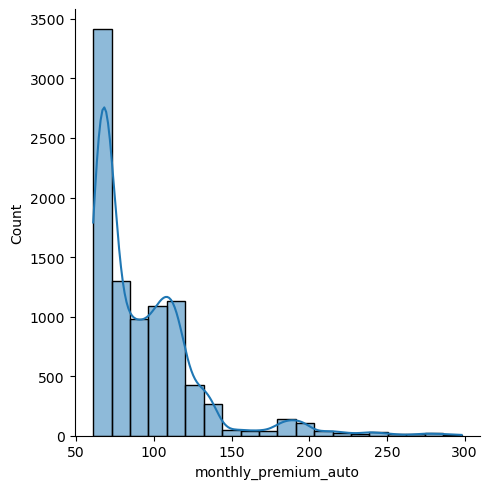

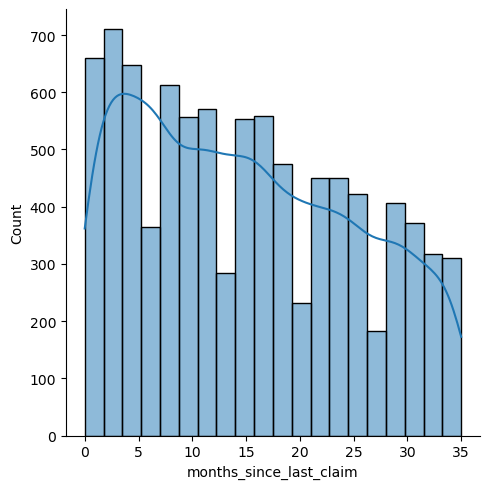

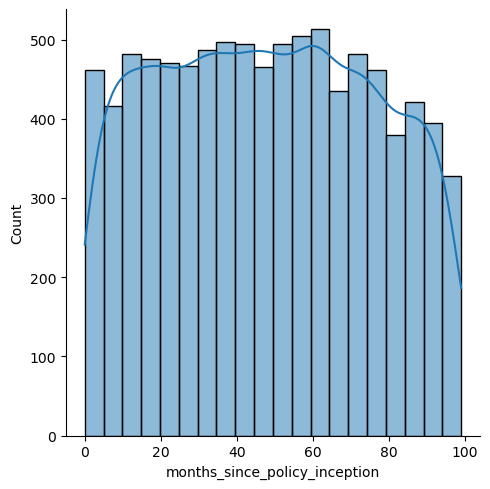

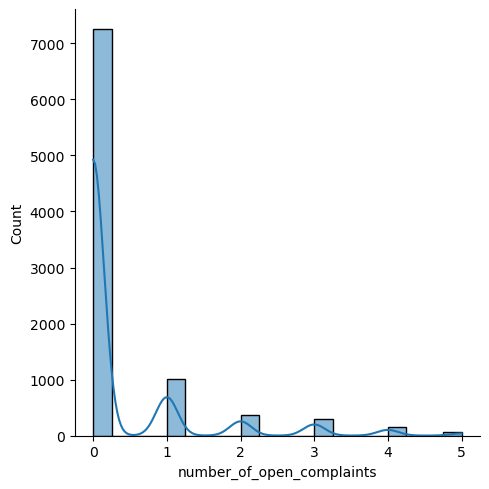

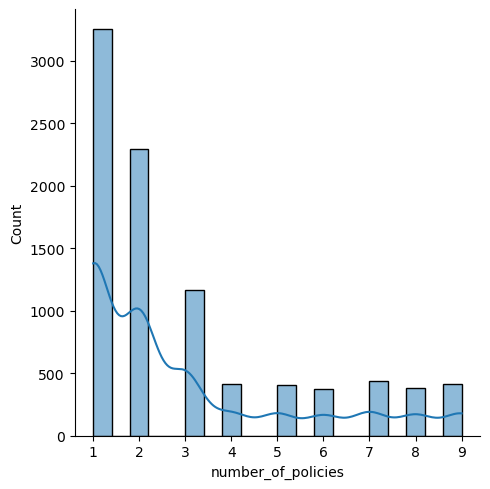

In [23]:
plot_discrete_data(discrete_df)

monthly_premium_auto has data slightly skewed towards right. 
months_since_last_claim has curve going down at 5, 20,27.
months_since_policy_inception shows normal distribution.

# Look for outliers in the continuous variables. 

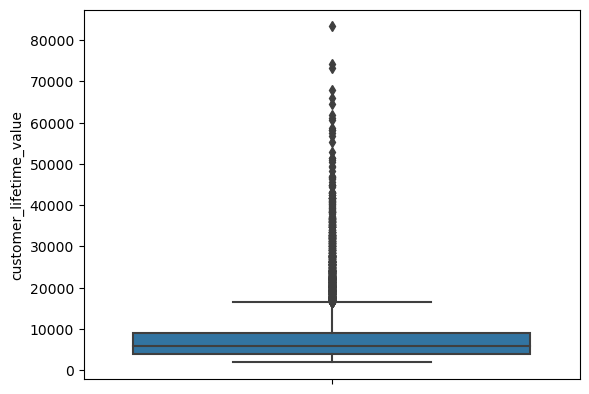

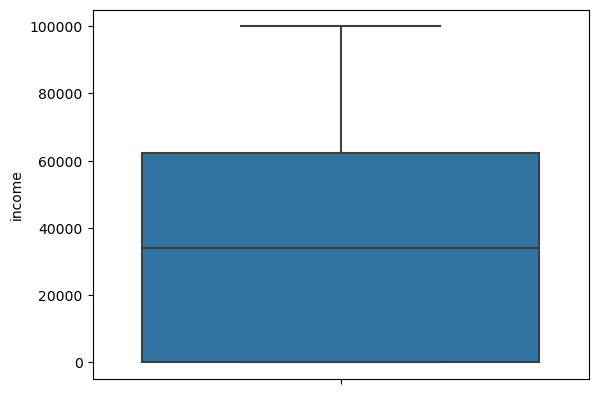

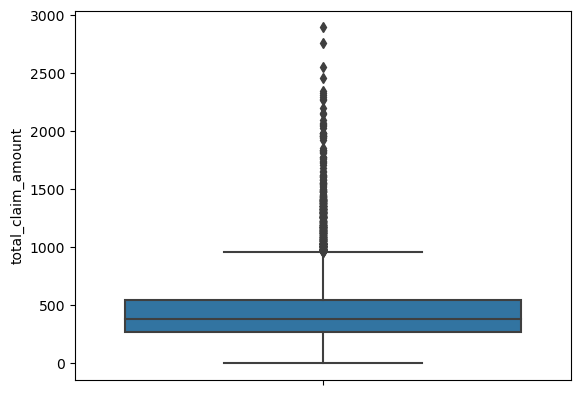

In [24]:
for i in continuous_df:
    sns.boxplot(y = continuous_df[i])
    plt.show()

# Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [25]:
# Yes. As per above plot, there are outliers. Hence I will use log-transform on them.

def log_transfom_clean(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

# Applying log transform to customer_lifetime_value and plotting it again to check for outliers.

In [26]:
continuous_df["customer_lifetime_value_transformed"] = continuous_df["customer_lifetime_value"].apply(log_transfom_clean)
display(np.mean(continuous_df["customer_lifetime_value_transformed"]))
continuous_df["customer_lifetime_value_transformed"].isna().sum()

/var/folders/yl/blp7v0ys1lzdfkls51wcv3l40000gn/T/ipykernel_33741/3960454183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df["customer_lifetime_value_transformed"] = continuous_df["customer_lifetime_value"].apply(log_transfom_clean)


8.748561782441605

0

<Axes: >

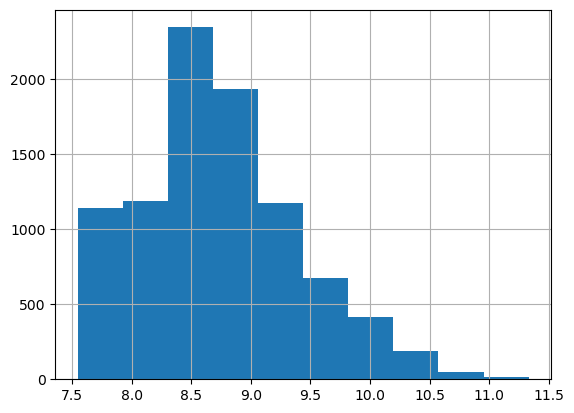

In [27]:
continuous_df["customer_lifetime_value_transformed"].hist()

<Axes: ylabel='customer_lifetime_value_transformed'>

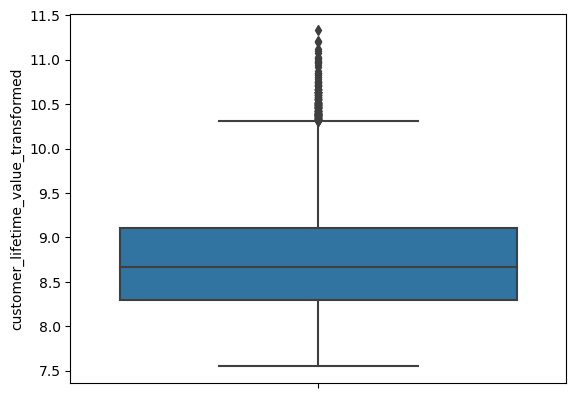

In [28]:
sns.boxplot(y = continuous_df["customer_lifetime_value_transformed"])

In [29]:
numerical_df["customer_lifetime_value_transformed"] = continuous_df["customer_lifetime_value_transformed"]
continuous_df["customer_lifetime_value_transformed"].isna().sum()

0

In [30]:
continuous_df["customer_lifetime_value"].isna().sum()

0

After log transformation, the outliers have gone.

# Applying log transform to total_claim_amount and plotting it again to check for outliers.

In [31]:
continuous_df["total_claim_amount_transformed"] = continuous_df["total_claim_amount"].apply(log_transfom_clean)
numerical_df["total_claim_amount_transformed"] = continuous_df["total_claim_amount_transformed"]
np.mean(continuous_df["total_claim_amount_transformed"])

/var/folders/yl/blp7v0ys1lzdfkls51wcv3l40000gn/T/ipykernel_33741/2452557962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df["total_claim_amount_transformed"] = continuous_df["total_claim_amount"].apply(log_transfom_clean)


5.790425152109046

<Axes: >

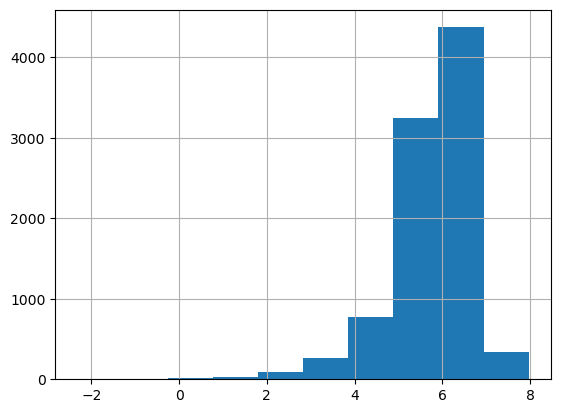

In [32]:
continuous_df["total_claim_amount_transformed"].hist()

<Axes: ylabel='total_claim_amount_transformed'>

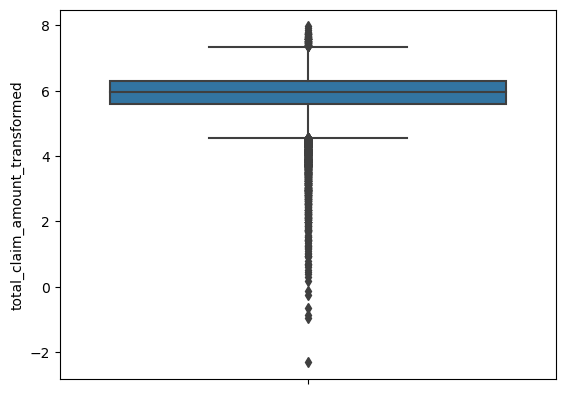

In [33]:
sns.boxplot(y = continuous_df["total_claim_amount_transformed"])

After log transformation, the plot doesn't looks as expected. Hence now will be using quantile to remove the outliers.

In [34]:
continuous_df = continuous_df.drop("total_claim_amount_transformed", axis = 1)

In [35]:
continuous_df["total_claim_amount"].isna().sum()

0

In [36]:
iqr = np.percentile(continuous_df["total_claim_amount"],75) - np.percentile(continuous_df["total_claim_amount"],25)
upper_limit = np.percentile(continuous_df["total_claim_amount"],75) + 1.5*iqr

print(iqr)
print(upper_limit)

275.25659425
960.3997301249999


In [37]:
continuous_df[continuous_df["total_claim_amount"] > upper_limit]

,customer_lifetime_value,income,total_claim_amount,customer_lifetime_value_transformed
1,6979.535903,0,1131.464935,8.850738
73,6781.270203,0,982.399613,8.821920
135,4022.963529,0,975.107098,8.299774
142,9047.119209,0,1087.995426,9.110202
181,16936.271470,39411,1122.658899,9.737213
...,...,...,...,...
9049,32104.699570,89546,2452.894264,10.376758
9103,15245.254950,30205,1329.957905,9.632024
9107,5619.689084,0,1027.000029,8.634032
9109,3622.872124,0,1254.177129,8.195022


In [38]:
# Cannot delete 453 rows based on upper limit. Hence I will remove only the few outliers as per the graph.

In [39]:
# Below are the 3 outliers.
continuous_df[continuous_df["total_claim_amount"] > 2500]

,customer_lifetime_value,income,total_claim_amount,customer_lifetime_value_transformed
888,8581.278701,27689,2893.239678,9.057338
4930,43217.216110,51504,2552.343856,10.673994
5074,9295.411150,0,2759.794354,9.137276


In [40]:
continuous_df = continuous_df[continuous_df["total_claim_amount"] < 2500]
numerical_df = numerical_df[numerical_df["total_claim_amount"] < 2500]
continuous_df

,customer_lifetime_value,income,total_claim_amount,customer_lifetime_value_transformed
0,2763.519279,56274,384.811147,7.924260
1,6979.535903,0,1131.464935,8.850738
2,12887.431650,48767,566.472247,9.464008
3,7645.861827,0,529.881344,8.941920
4,2813.692575,43836,138.130879,7.942253
...,...,...,...,...
9129,23405.987980,71941,198.234764,10.060747
9130,3096.511217,21604,379.200000,8.038031
9131,8163.890428,0,790.784983,9.007476
9132,7524.442436,21941,691.200000,8.925912


# Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [41]:
continuous_df.isna().sum()

customer_lifetime_value                0
income                                 0
total_claim_amount                     0
customer_lifetime_value_transformed    0
dtype: int64

In [42]:
discrete_df.isna().sum()

monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

In [43]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_transformed,total_claim_amount_transformed
0,2763.519279,56274,69,32,5,0,1,384.811147,7.924260,5.952753
1,6979.535903,0,94,13,42,0,8,1131.464935,8.850738,7.031268
2,12887.431650,48767,108,18,38,0,2,566.472247,9.464008,6.339428
3,7645.861827,0,106,18,65,0,7,529.881344,8.941920,6.272653
4,2813.692575,43836,73,12,44,0,1,138.130879,7.942253,4.928202
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,10.060747,5.289452
9130,3096.511217,21604,79,14,28,0,1,379.200000,8.038031,5.938064
9131,8163.890428,0,85,9,37,3,2,790.784983,9.007476,6.673026
9132,7524.442436,21941,96,34,3,0,3,691.200000,8.925912,6.538429


# Save the numerical_df to csv as numerical.csv

In [44]:
numerical_df.to_csv("numerical.csv")

# Cleaning categorical data

# Find all of the categorical data. Save it in a categorical_df variable.

In [45]:
categorical_df = data.select_dtypes(np.object)
categorical_df.head()

/var/folders/yl/blp7v0ys1lzdfkls51wcv3l40000gn/T/ipykernel_33741/3540469402.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = data.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


# Check for NaN values 

In [46]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

# Check all unique values of columns.

In [47]:
for i in categorical_df:
    
    print(categorical_df[i].nunique())
    print(categorical_df[i].unique())

9134
['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
5
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
2
['No' 'Yes']
3
['Basic' 'Extended' 'Premium']
5
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
5
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
2
['F' 'M']
3
['Suburban' 'Rural' 'Urban']
3
['Married' 'Single' 'Divorced']
3
['Corporate Auto' 'Personal Auto' 'Special Auto']
9
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
4
['Offer1' 'Offer3' 'Offer2' 'Offer4']
4
['Agent' 'Call Center' 'Web' 'Branch']
6
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
3
['Medsize' 'Small' 'Large']


# Check dtypes

In [48]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

# Does any column contain alpha and numeric data? Decide how to clean it and do it now.

In [49]:
categorical_df.customer.value_counts()

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

Customer contains Alphanumeric values. But it doesn't make any sense to split them as they uniquely identify the column.

# Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [50]:
display(categorical_df["policy"].value_counts())
categorical_df["policy_type"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [51]:
# After observing their numbers, Personal Auto is addition of Personal L1 + L2 + L3

# 3426+2122+1240 = 6788
# 1014+595+359 = 1968
# 164+148+66 = 378

# Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [52]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [53]:
categorical_df.state.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

For state, Nevada and Washington has small value compared to California. Hence Nevada and Washington can be combined to other category

In [54]:
categorical_df["state"] = np.where(categorical_df["state"].isin(["Nevada","Washington"]), "Other", categorical_df.state)
categorical_df["state"].value_counts()

California    3150
Oregon        2601
Arizona       1703
Other         1680
Name: state, dtype: int64

In [55]:
categorical_df.response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [56]:
categorical_df.coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [57]:
# Not combining Master and Doctor counts in other category as education might help us to show if the customer can afford or not.
categorical_df.education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [58]:
categorical_df.employmentstatus = np.where(categorical_df.employmentstatus.isin(["Medical Leave", "Disabled", "Retired"]), "Other", categorical_df.employmentstatus)
categorical_df.employmentstatus.value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

In [59]:
categorical_df.gender.value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [60]:
categorical_df.location_code.value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [61]:
categorical_df.marital_status.value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [62]:
categorical_df.to_csv("categorical.csv")